## Project Title: Aviation Accident Data Analysis

#### Objectives:
This project aims to analyze aviation accident data to identify trends, clean inconsistencies, and visualize insights. The workflow follows five structured steps:

### Workflow & Steps

#### Step 1: Importing and Loading Data
1.1 Import necessary Python libraries  
1.2 Load the dataset and display the first few rows  

#### Step 2: Exploratory Data Analysis (EDA)
2.1 Check dataset shape (rows & columns)  
2.2 View dataset information (column types, missing values)  
2.3 Summary statistics of numerical columns  
2.4 Check for duplicate rows  
2.5 Check for unique values in key categorical columns  


#### Step 3: Data Cleaning
3.1 Remove duplicates  
3.2 Handle missing values appropriately  
3.3 Convert data types if necessary  
3.4 Standardize column names for consistency  
3.5 Correct inconsistent categorical values  
3.6 Save the cleaned dataset  

#### Step 4: Data Visualization
4.1 Plot distributions of numerical variables  
4.2 Visualize accident trends over time  
4.3 Show accidents by aircraft type  
4.4 Analyze fatalities and survivability rates  
4.5 Heatmaps to show correlations  

#### Step 5: Additional Enhancements & Insights
5.1 Feature Engineering (if necessary)  
5.2 Save the final cleaned dataset for further use  

---


### Step 1: Importing Libraries and Loading Dataset

 1.1 Import necessary libraries

In [57]:
#  Import  library
import pandas as pd  # Data manipulation and analysis

1.2 loading a dataset

In [58]:
# 1.2 Load the dataset
file_path = r"C:\\Users\\hp\\OneDrive\\Desktop\\DSF-FT12\\DS-Phase1\\Phase 1 Project\\AviationData.csv"
# Load dataset with encoding to prevent character errors
df = pd.read_csv(file_path, encoding="ISO-8859-1")

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
# 1.3 Display first few rows
df.head()  # Preview the dataset



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [60]:

# 1.4 Check dataset info
df.info()  # Summary of dataset, including column types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [61]:
# 1.5 Check for missing values
df.isnull().sum()  # Count missing values in each column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

### Step 2: Exploratory Data Analysis (EDA)


 2.1 Summary statistics


In [62]:
# 2.1 Summary statistics
df.describe()  # Generates summary statistics for numerical columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


 2.2 Check for duplicates



In [63]:
# 2.2 Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")  # Identify duplicate records

Number of duplicate rows: 0


 2.3 Display categorical features summary

In [64]:
# 2.3 Display categorical features summary
df.describe(include=['O'])  # Provides summary for categorical columns

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,CEN22LA346,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [65]:
df.shape # chech the  dataframe rows and column

(88889, 31)

 2.5 Identify missing values

In [66]:
# 2.5 Identify missing values
df.isnull().sum()  # Count missing values in each column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i


### Step 3: Data Cleaning

 3.1 Remove duplicates

In [67]:
# 3.1 Remove duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows

 3.2 Handle missing values () Fill with median or mode

In [68]:
# 3.2 Handle missing values  
        # Check which columns still have missing values
missing_values = df.isnull().sum()
print("Columns with missing values after cleaning:\n",
      missing_values[missing_values > 0])

Columns with missing values after cleaning:
 Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64


In [69]:
df.dropna(inplace=True)

 3.3 Standardize column names


In [70]:
# 3.4 Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(
    ' ', '_')  # Standardize column names

3.4 Correct inconsistent categorical values (Example: Convert text to lowercase)



In [71]:
#3.4 Correct inconsistent categorical values (Example: Convert text to lowercase)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()


3.5 Verify dataset after cleaning

In [72]:
#3.5 Verify dataset after cleaning
print({"missing_values": df.isnull().sum().sum(), "duplicates": df.duplicated(
).sum(), "data_types": df.dtypes.to_dict(), "shape": df.shape})

{'missing_values': 0, 'duplicates': 0, 'data_types': {'event.id': dtype('O'), 'investigation.type': dtype('O'), 'accident.number': dtype('O'), 'event.date': dtype('O'), 'location': dtype('O'), 'country': dtype('O'), 'latitude': dtype('O'), 'longitude': dtype('O'), 'airport.code': dtype('O'), 'airport.name': dtype('O'), 'injury.severity': dtype('O'), 'aircraft.damage': dtype('O'), 'aircraft.category': dtype('O'), 'registration.number': dtype('O'), 'make': dtype('O'), 'model': dtype('O'), 'amateur.built': dtype('O'), 'number.of.engines': dtype('float64'), 'engine.type': dtype('O'), 'far.description': dtype('O'), 'schedule': dtype('O'), 'purpose.of.flight': dtype('O'), 'air.carrier': dtype('O'), 'total.fatal.injuries': dtype('float64'), 'total.serious.injuries': dtype('float64'), 'total.minor.injuries': dtype('float64'), 'total.uninjured': dtype('float64'), 'weather.condition': dtype('O'), 'broad.phase.of.flight': dtype('O'), 'report.status': dtype('O'), 'publication.date': dtype('O')}, '

In [73]:
df .info

<bound method DataFrame.info of Empty DataFrame
Columns: [event.id, investigation.type, accident.number, event.date, location, country, latitude, longitude, airport.code, airport.name, injury.severity, aircraft.damage, aircraft.category, registration.number, make, model, amateur.built, number.of.engines, engine.type, far.description, schedule, purpose.of.flight, air.carrier, total.fatal.injuries, total.serious.injuries, total.minor.injuries, total.uninjured, weather.condition, broad.phase.of.flight, report.status, publication.date]
Index: []

[0 rows x 31 columns]>

### Step 4: Data Visualization


step 4 import matplotlib and sns

In [74]:
# step 4.1 import matplotlib and sns
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced visualizatio

In [75]:
# 4.1 Aviation Accidents Over the Years
plt.figure(figsize=(12, 6))
df['event_year'] = df['event.date'].dt.year
event_counts = df.groupby('event_year').size().reset_index(name='count')
sns.lineplot(data=event_counts, x='event_year',
             y='count', marker='o', color='blue')
plt.title("Aviation Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 864x432 with 0 Axes>

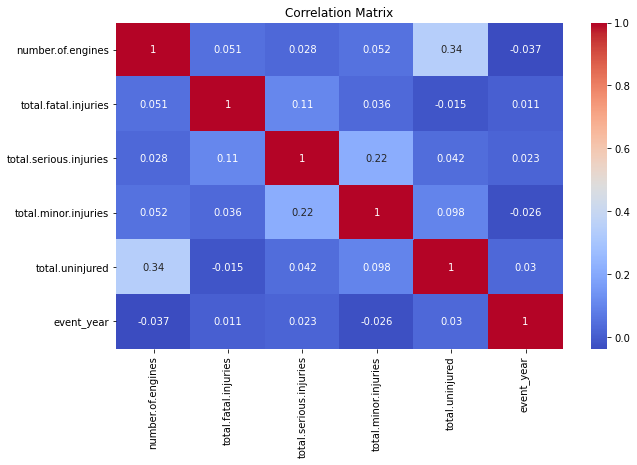

In [ ]:
# 4.2 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(
    include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

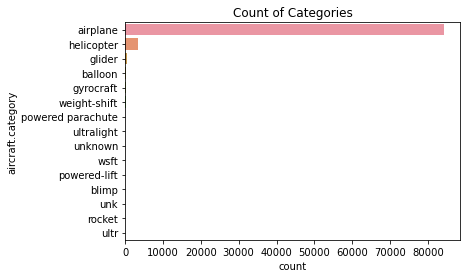

In [ ]:
#  4.3 for categorical column 
sns.countplot(y=df['aircraft.category'],
              order=df['aircraft.category'].value_counts().index)
plt.title("Count of Categories")
plt.show()

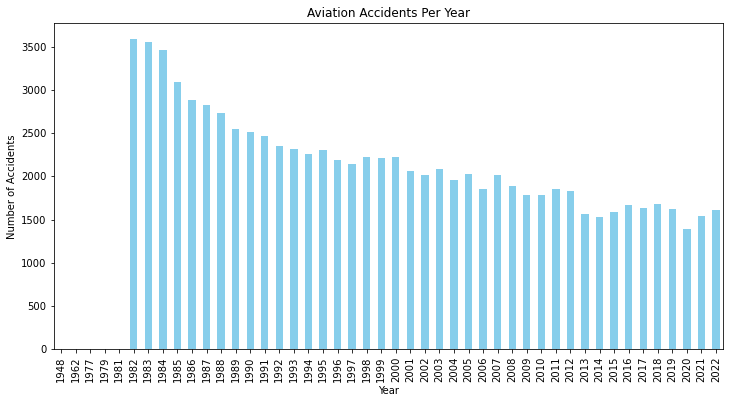

In [ ]:
# 4.4. Accidents per year
if 'event_year' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby('event_year').size().plot(kind='bar', color='skyblue')
    plt.title("Aviation Accidents Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Accidents")
    plt.show()

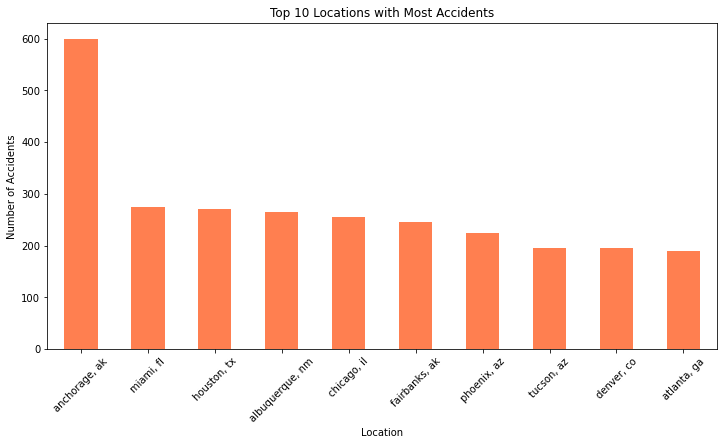

In [ ]:

# 4.5. Accidents by location
if 'location' in df.columns:
    plt.figure(figsize=(12, 6))
    df['location'].value_counts().nlargest(10).plot(kind='bar', color='coral')
    plt.title("Top 10 Locations with Most Accidents")
    plt.xlabel("Location")
    plt.ylabel("Number of Accidents")
    plt.xticks(rotation=45)
    plt.show()

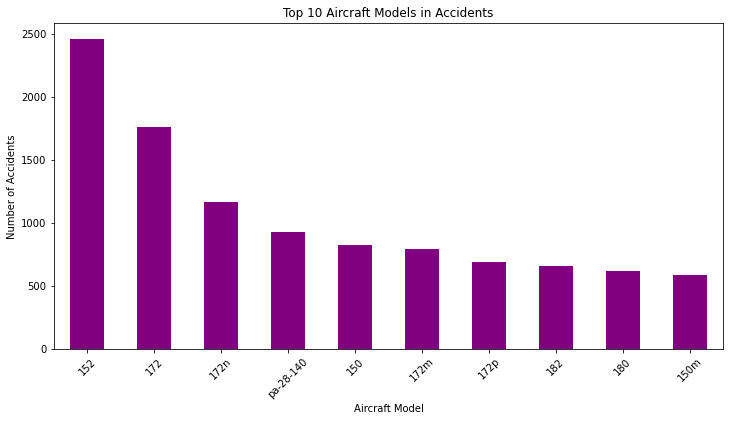

In [ ]:
# 4.6 Aircraft Models in Accidents
if 'model' in df.columns:
    plt.figure(figsize=(12, 6))
    df['model'].value_counts().nlargest(10).plot(kind='bar', color='purple')
    plt.title("Top 10 Aircraft Models in Accidents")
    plt.xlabel("Aircraft Model")
    plt.ylabel("Number of Accidents")
    plt.xticks(rotation=45)
    plt.show()

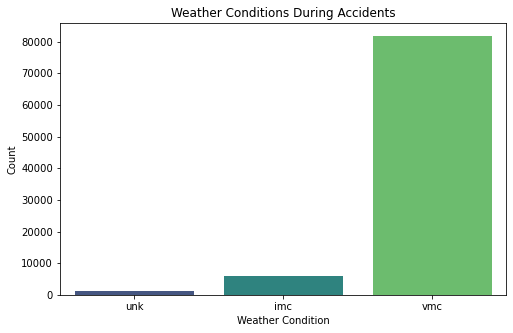

In [ ]:
# 4.7  Weather conditions during accidents
if 'weather.condition' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df['weather.condition'], palette='viridis')
    plt.title("Weather Conditions During Accidents")
    plt.xlabel("Weather Condition")
    plt.ylabel("Count")
    plt.show()